In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
combined = pd.merge(ride_data, city_data, on = "city")

# Display the data table for preview
combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [9]:
# Obtain the x and y coordinates for each of the three city types
combined.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

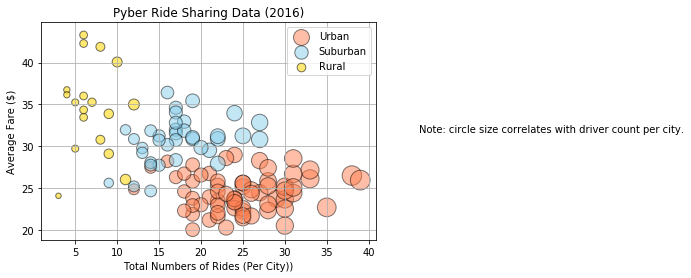

In [38]:
# Build the scatter plots for each city types
#City Type (Urban, Suburban, Rural)
urban = combined.loc[(combined["type"] == "Urban")]
suburban = combined.loc[(combined["type"] == "Suburban")]
rural = combined.loc[(combined["type"] == "Rural")]

#Average Fare ($) Per City
avg_fare_urban = urban.groupby(['city'])['fare'].mean()
avg_fare_suburban = suburban.groupby(['city'])['fare'].mean()
avg_fare_rural = rural.groupby(['city'])['fare'].mean()

#Total Number of Rides Per City
total_rides_urban = urban.groupby(['city']).count()['ride_id']
total_rides_suburban = suburban.groupby(['city']).count()['ride_id']
total_rides_rural = rural.groupby(['city']).count()['ride_id']

#Total Number of Drivers Per City
total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()
total_drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()
total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

#Plot
plt.scatter(total_rides_urban, avg_fare_urban,s=total_drivers_urban*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban,s=total_drivers_suburban*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.figtext(1,.5, "Note: circle size correlates with driver count per city.")

# Create a legend
plt.legend(loc='upper right')

#Save figure
plt.savefig("plot.png")

plt.show()

## Total Fares by City Type

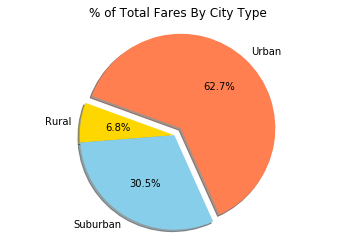

In [39]:
# Calculate Type Percents
total_fare = combined.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("pie_fare.png")
plt.show()

## Total Rides by City Type

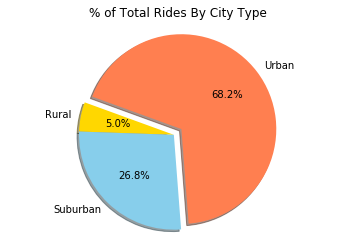

In [40]:
# Calculate Type Percents
total_rides = combined.groupby(['type'])['ride_id'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("pie_city.png")
plt.show()

## Total Drivers by City Type

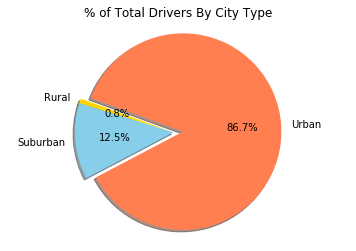

In [41]:
# Calculate Type Percents
total_drivers = combined.groupby(['type'])['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("pie_driver.png")
plt.show()

In [43]:
print("Three observable trends from this data: While the rural areas have the highest fare amounts, the rural areas make up the smallest percent of the total fares. In contrast, the Urban areas show the lowest fares, but the highest percentage of total fares. The Urban areas also have the highest concentration of drivers and rides.")

Three observable trends from this data: While the rural areas have the highest fare amounts, the rural areas make up the smallest percent of the total fares. In contrast, the Urban areas show the lowest fares, but the highest percentage of total fares. The Urban areas also have the highest concentration of drivers and rides.
